# 로지스틱 회귀 -분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Sigmoid 함수

In [2]:
# 시그모이드 함수 만들기
def sigmoid(x):
    return (1./(1+np.exp(-x)))

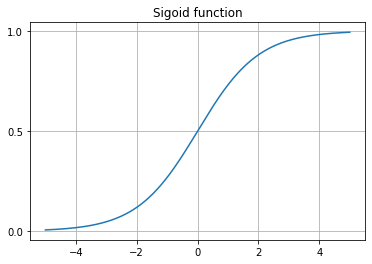

In [3]:
xs = np.linspace(-5,5,1001)  
ys = sigmoid(xs)
plt.plot(xs, ys)
plt.title('Sigoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.show()


AttributeError: 'Line2D' object has no property 'lable'

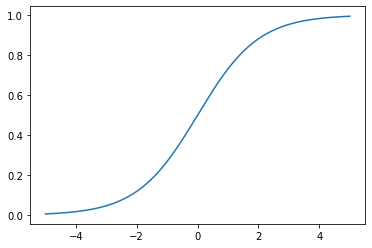

In [4]:
# 하나 더 그려보면 


xs = np.linspace(-5,5,1001)  
ys = sigmoid(xs)

plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, ys*(1-ys), lable='derivative')
plt.title('Sigoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.show()

* 이진 분류 




In [5]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
cancer.data.shape

(569, 30)

In [6]:
#로지스틱 회귀를 사용하려면 정규화 해야함
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)


In [7]:
# 트레인 테스트 스플릿 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   cancer_std, cancer.target, stratify=cancer.target, random_state=2021
)
# X_train.shape, X_test.shape, y_test.shape, y_train.shape

In [8]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2021)
lr.fit(X_train, y_train)

LogisticRegression(random_state=2021)

In [9]:
lr.coef_

array([[-0.38562354, -0.34262207, -0.36413343, -0.41168842, -0.125392  ,
         0.53427855, -0.57868168, -0.85019026,  0.08724313,  0.2574702 ,
        -1.06464785,  0.20019118, -0.74749809, -0.84878727, -0.27163866,
         0.58431601,  0.06165371, -0.36110527,  0.42706156,  0.66294691,
        -1.01272202, -1.1987033 , -0.86629684, -0.96940075, -0.66452609,
         0.00882768, -0.84903123, -0.74604926, -0.72522438, -0.52639092]])

In [10]:
lr.intercept_

array([0.29535933])

In [11]:
X_test[0]

array([ 1.74177621,  0.8704049 ,  1.66535961,  1.73237389, -0.39712318,
        0.51091323,  0.72443042,  0.9778719 ,  1.03460934, -0.89416933,
        1.27198647,  0.53005435,  0.83558235,  1.04580552, -0.34167349,
        0.52211232,  0.34570453,  0.1449932 ,  0.72982504,  0.23303919,
        1.64647389,  0.96285899,  1.45470423,  1.52835897, -0.58602424,
        0.63381753,  0.66019449,  0.65008095,  1.27520633, -0.01473048])

- predict_praba() 메소드를 이용하여 X_test[0]의 예측값 구하기

In [19]:
lr.predict_proba(X_test[0].reshape(1,-1))
## 이 코드는 잘 모르겠다.

array([[9.99994552e-01, 5.44815673e-06]])

- 직접 계산 : X_test[0]가 1이 될 확률

In [20]:
val = np.dot(lr.coef_, X_test[0]) + lr.intercept_   # y = wX + b
val

array([-12.12022777])

In [21]:
# sigmoid(np.dot(lr.coef_, X_test[0]) + lr.intercept_)
sigmoid(val)

array([5.44815673e-06])